# Config and Import

In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Read files

In [2]:
ruta = '../data/'

df_sales = pd.read_csv(ruta+'weekly_sales_cleandata.csv')

In [3]:
df_sales.head()

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414


In [4]:
df_sales['sell_price'].isnull().sum()

0

In [5]:
df_sales[df_sales['sell_price'].isnull()]

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price


In [9]:
df_sales[df_sales['sell_price'].isnull()]['yearweek'].value_counts()

Series([], Name: count, dtype: int64)

In [10]:
df_sales['revenue'] = df_sales['qty_sold']*df_sales['sell_price']

# Clustering

## >> Clustering por productos

In [11]:
df_product_features = df_sales.groupby('item').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean'),
                        max_revenue = ('revenue', 'max'),
                        min_revenue = ('revenue','min')
                                                
                    )
df_product_features.sample(15)

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
item,,,,,,,,,,
SUPERMARKET_3_668,136922,4,49.971533,173,1.7760,2.0160,262660.5120,95.861501,328.0080,7.104
ACCESORIES_1_367,15095,0,5.509124,24,10.9858,12.9542,167022.6502,60.957172,263.6592,0.000
SUPERMARKET_3_677,9923,0,3.621533,21,3.0000,4.7760,46736.2560,17.057028,100.2960,0.000
HOME_&_GARDEN_2_418,1618,0,0.590511,8,3.4750,3.4750,5622.5500,2.052026,27.8000,0.000
SUPERMARKET_1_127,22393,0,8.172628,122,1.2000,2.5440,53064.6720,19.366669,284.0160,0.000
ACCESORIES_1_038,5934,0,2.165693,11,4.2161,4.2826,25297.4379,9.232642,47.1086,0.000
SUPERMARKET_3_522,5604,0,2.045255,29,2.3760,3.2160,17280.6120,6.306793,93.2640,0.000
HOME_&_GARDEN_2_149,1078,0,0.393431,6,1.2500,4.9750,5350.7750,1.952838,29.8500,0.000
SUPERMARKET_3_054,62178,0,22.692701,120,1.7760,2.6160,147031.8960,53.661276,225.8160,0.000


In [12]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [13]:
df_product_transformed = pipe.fit_transform(df_product_features)

In [14]:
df_product_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
item,,,,,,,,,,
ACCESORIES_1_001,-0.028417,0.0,-0.028417,-0.033986,0.246068,0.340870,0.003018,0.003018,-0.003682,0.0
ACCESORIES_1_002,-0.023364,0.0,-0.023364,0.005098,0.015054,0.035379,-0.030747,-0.030747,0.025398,0.0
ACCESORIES_1_003,-0.042319,0.0,-0.042319,-0.028888,-0.066572,0.144288,-0.069559,-0.069559,-0.052660,0.0
ACCESORIES_1_004,0.155075,0.0,0.155075,0.083265,0.151352,0.071864,0.353998,0.353998,0.219774,0.0
ACCESORIES_1_005,0.026649,0.0,0.026649,0.015294,-0.023449,-0.013085,0.022629,0.022629,-0.004426,0.0
...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,0.030660,0.0,0.030660,0.108755,-0.070173,-0.034392,0.013823,0.013823,0.086050,0.0
SUPERMARKET_3_824,-0.006282,0.0,-0.006282,-0.008496,0.000000,-0.049132,-0.033132,-0.033132,-0.036144,0.0
SUPERMARKET_3_825,0.020921,0.0,0.020921,0.042482,-0.000695,0.034392,0.041319,0.041319,0.079730,0.0


In [15]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_product_transformed)

    sse[k] = clustering_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters


  File "c:\Users\v.capria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


## Elbow curve

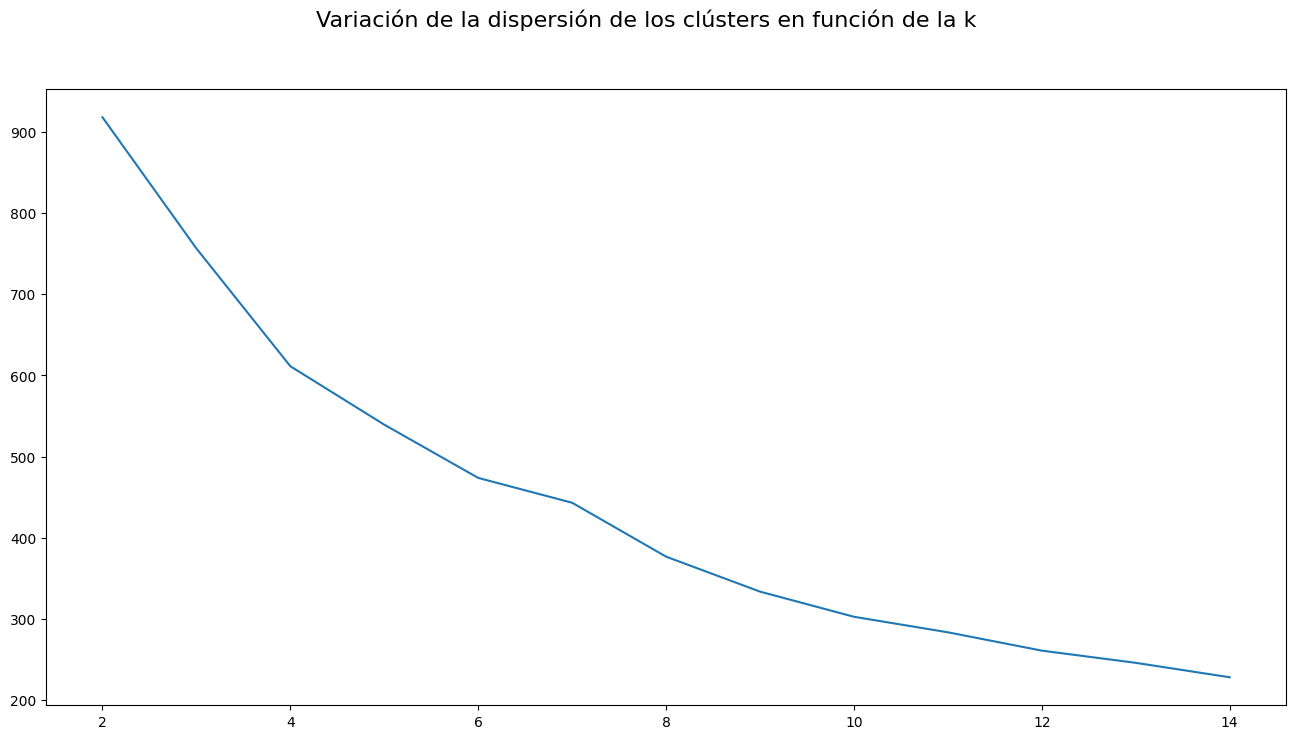

In [16]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Vemos que hay dos puntos donde hay diferencia en la pendiente, uno con 4 clusters y otro mas pronunciado con 8. Este es el que cogemos

## Segmentación de los clientes con la "k adecuada"

In [46]:
# Añadimos el clustering a la pipeline 

pipe = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 4, random_state = 175))
])

In [47]:
# Nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos:
pipe.fit(df_product_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=4, random_state=175))])

In [48]:
#X_processed = pipe[:2].transform(df_features)
X_processed = df_product_features.copy() 
#para poder analizar las variables sin escalado nos saltamos los ultimos pasos y procesamos los datos iniciales justo antes del escalado

In [49]:
labels = pipe.predict(df_product_features)
X_processed["cluster"] = labels

In [50]:
X_processed.shape

(3049, 11)

In [51]:
X_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue,cluster
item,,,,,,,,,,,
ACCESORIES_1_001,4093,0,1.493796,13,6.6500,12.7414,45020.6596,16.430898,142.8154,0.0,2
ACCESORIES_1_002,5059,0,1.846350,36,2.6600,5.2801,26705.4557,9.746517,190.0836,0.0,0
ACCESORIES_1_003,1435,0,0.523723,16,1.2502,7.9401,5652.2340,2.062859,63.2016,0.0,0
ACCESORIES_1_004,39175,0,14.297445,82,5.0141,6.1712,235405.2253,85.914316,506.0384,0.0,0
ACCESORIES_1_005,14621,0,5.336131,42,1.9950,4.0964,55658.1991,20.313211,141.6051,0.0,0


### Ficha de los productos

In [52]:
ficha_df = pd.DataFrame()

In [53]:
df_product_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue', 'max_revenue',
       'min_revenue'],
      dtype='object')>

In [54]:
resumen_data = X_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data

cluster                      0              1             2             3
total_sales mean  14293.528787  114873.870647   9302.653061  5.648956e+05
            std   14861.614121   66781.523629   8418.773056  2.897058e+05
            min     568.000000   12286.000000    789.000000  2.831040e+05
            25%    4275.000000   69057.000000   3202.500000  3.459040e+05
            50%    9072.000000   98653.000000   6381.500000  4.912870e+05
            75%   19065.000000  141421.000000  12381.750000  7.427705e+05
            max   97164.000000  396172.000000  40354.000000  1.002529e+06

In [55]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [56]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

## >> Clustering por tienda

In [57]:
df_sales.head()

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,revenue
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,0.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,0.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,0.0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,0.0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,0.0


In [58]:
df_store_features = df_sales.groupby('store').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean'),
                        max_revenue = ('revenue', 'max'),
                        min_revenue = ('revenue','min')
                        
                    )
df_store_features

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
store,,,,,,,,,,
Back_Bay,6089330,0,7.288892,1215,0.0240,41.2034,2.194624e+07,26.269516,6968.4552,0.0
Brooklyn,4103676,0,4.912076,567,0.0120,41.2034,1.504681e+07,18.010937,1744.9920,0.0
Greenwich_Village,7698216,0,9.214719,1697,0.0125,41.2034,2.773509e+07,33.198741,4153.3200,0.0
Harlem,5685475,0,6.805480,638,0.2400,41.2034,2.150717e+07,25.743960,1613.5200,0.0
Midtown_Village,5149062,0,6.163397,690,0.0120,44.8500,1.823533e+07,21.827588,1079.9520,0.0
Queen_Village,6427782,0,7.694017,1695,0.0125,134.1500,2.075230e+07,24.840382,2208.3840,0.0
Roxbury,7214384,0,8.635575,2076,0.0600,38.5168,2.526658e+07,30.243953,3453.6642,0.0
South_End,5595292,0,6.697532,1676,0.0600,65.7750,1.934092e+07,23.150972,2219.7000,0.0
Tribeca,11188180,0,13.392186,3976,0.0133,41.2034,3.949288e+07,47.272742,8623.3680,0.0


In [59]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [60]:
df_store_transformed = pipe.fit_transform(df_store_features)

In [61]:
df_store_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
store,,,,,,,,,,
Back_Bay,-0.024995,0.0,-0.024995,-0.071186,0.025260,0.000000,0.015546,0.015546,0.558765,0.0
Brooklyn,-0.318279,0.0,-0.318279,-0.271309,-0.031398,0.000000,-0.279454,-0.279454,-0.147636,0.0
Greenwich_Village,0.212640,0.0,0.212640,0.077671,-0.029037,0.000000,0.263061,0.263061,0.178057,0.0
Harlem,-0.084645,0.0,-0.084645,-0.249382,1.045090,0.000000,-0.003227,-0.003227,-0.165416,0.0
Midtown_Village,-0.163874,0.0,-0.163874,-0.233323,-0.031398,0.040306,-0.143122,-0.143122,-0.237573,0.0
Queen_Village,0.024995,0.0,0.024995,0.077054,-0.029037,1.027330,-0.035503,-0.035503,-0.084969,0.0
Roxbury,0.141177,0.0,0.141177,0.194719,0.195231,-0.029695,0.157515,0.157515,0.083438,0.0
South_End,-0.097965,0.0,-0.097965,0.071186,0.195231,0.271588,-0.095850,-0.095850,-0.083438,0.0
Tribeca,0.728113,0.0,0.728113,0.781501,-0.025260,0.000000,0.765791,0.765791,0.782569,0.0


In [62]:
sse_store = {}

for k in range(2, 10):                  # Ver si este rango esta bien o modificar.

    print(f"Fitting pipe with {k} clusters")

    clustering_store_model = KMeans(n_clusters = k)
    clustering_store_model.fit(df_store_transformed)

    sse_store[k] = clustering_store_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters


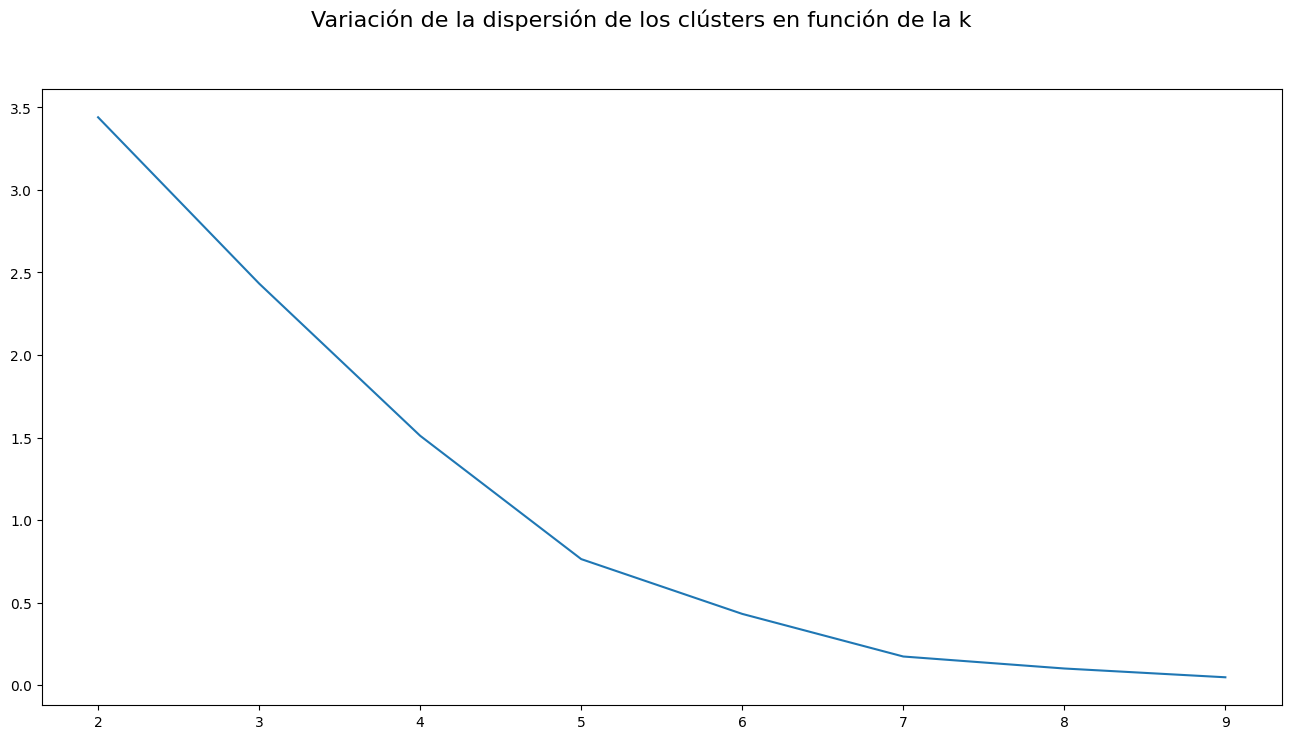

In [63]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_store_values = list(sse_store.keys())
y_store_values = list(sse_store.values())

ax.plot(x_store_values, y_store_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

### Segmentacion de los clientes por stores.

In [64]:
pipe_store = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 5, random_state = 175))
])

In [65]:
# Nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos:
pipe_store.fit(df_store_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=5, random_state=175))])

In [66]:
#X_processed = pipe[:2].transform(df_features)
X_store_processed = df_store_features.copy() 

In [67]:
labels_store = pipe_store.predict(df_store_features)
X_store_processed["cluster"] = labels_store

In [68]:
X_store_processed.shape

(10, 11)

In [69]:
X_store_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue,cluster
store,,,,,,,,,,,
Back_Bay,6089330,0,7.288892,1215,0.0240,41.2034,2.194624e+07,26.269516,6968.4552,0.0,0
Brooklyn,4103676,0,4.912076,567,0.0120,41.2034,1.504681e+07,18.010937,1744.9920,0.0,1
Greenwich_Village,7698216,0,9.214719,1697,0.0125,41.2034,2.773509e+07,33.198741,4153.3200,0.0,0
Harlem,5685475,0,6.805480,638,0.2400,41.2034,2.150717e+07,25.743960,1613.5200,0.0,3
Midtown_Village,5149062,0,6.163397,690,0.0120,44.8500,1.823533e+07,21.827588,1079.9520,0.0,1


### Ficha de las tiendas

In [70]:
ficha_df_store = pd.DataFrame()

In [71]:
df_store_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue', 'max_revenue',
       'min_revenue'],
      dtype='object')>

In [72]:
resumen_data_store = X_store_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data_store

cluster                      0             1           2          3  \
total_sales mean  7.000643e+06  4.626369e+06  11188180.0  5685475.0   
            std   8.254649e+05  7.391995e+05         NaN        NaN   
            min   6.089330e+06  4.103676e+06  11188180.0  5685475.0   
            25%   6.651857e+06  4.365022e+06  11188180.0  5685475.0   
            50%   7.214384e+06  4.626369e+06  11188180.0  5685475.0   
            75%   7.456300e+06  4.887716e+06  11188180.0  5685475.0   
            max   7.698216e+06  5.149062e+06  11188180.0  5685475.0   

cluster                      4  
total_sales mean  6.189029e+06  
            std   5.174648e+05  
            min   5.595292e+06  
            25%   6.011537e+06  
            50%   6.427782e+06  
            75%   6.485897e+06  
            max   6.544012e+06

In [73]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data_store = X_store_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df_store = pd.concat([ficha_df_store, resumen_data_store])

In [74]:
ficha_df_store.style.background_gradient(cmap = 'Greens', axis = 1)